In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from get_stock_data import get_stock_information
from get_stock_data import get_stock_historical_data
from get_stock_data import draw_simple_stock_chart

In [2]:
samsung = get_stock_historical_data('005930', '01/01/2020')

In [3]:
samsung.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54


               Open     High      Low    Close  Volume  Change Pct
Date                                                              
2020-11-01  56600.0  56600.0  56600.0  56600.0       0        0.00
2020-11-02  56400.0  57500.0  56000.0  57400.0    1584        1.41
2020-11-03  57800.0  58900.0  57700.0  58800.0     136        2.44
2020-11-04  59000.0  59000.0  57900.0  58500.0    2494       -0.51
2020-11-05  59000.0  60300.0  58800.0  60300.0    1004        3.08


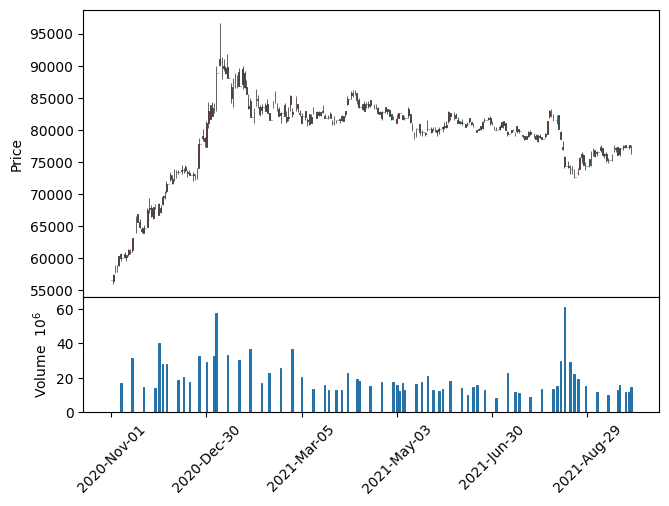

In [4]:
draw_simple_stock_chart('005930', '01/11/2020')

In [5]:
samsung_df = samsung.copy()

# 기술적 지표

## 지수이동평균(EMA) 함수 만들기

단순 이동평균

In [6]:
samsung_mov5 = samsung_df.Close.rolling(5).mean()
samsung_mov20 = samsung_df.Close.rolling(20).mean()

지수이동평균

In [7]:
samsung_eMov5 = samsung_df.ewm(span=5).mean()
samsung_eMov22 = samsung_df.ewm(span=22).mean()
samsung_eMov11 = samsung_df.ewm(span=11).mean()

In [8]:
samsung_eMov5

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-02,55500.000000,56000.000000,55000.000000,55200.000000,1.275690e+07,-1.080000
2020-01-03,55800.000000,56360.000000,54940.000000,55380.000000,1.428715e+07,-0.108000
2020-01-05,55657.894737,55952.631579,55205.263158,55436.842105,7.519551e+06,-0.056842
2020-01-06,55343.076923,55806.153846,54953.846154,55463.076923,8.648091e+06,-0.033231
2020-01-07,55480.094787,56034.123223,55201.895735,55592.417062,9.126319e+06,0.186825
...,...,...,...,...,...,...
2021-09-23,77024.032798,77284.708175,76554.480312,76999.918499,3.738161e+06,0.263892
2021-09-24,77216.021865,77423.138784,76736.320208,77099.945666,6.441088e+06,0.132595
2021-09-26,77244.014577,77382.092522,76924.213472,77166.630444,4.294058e+06,0.088397


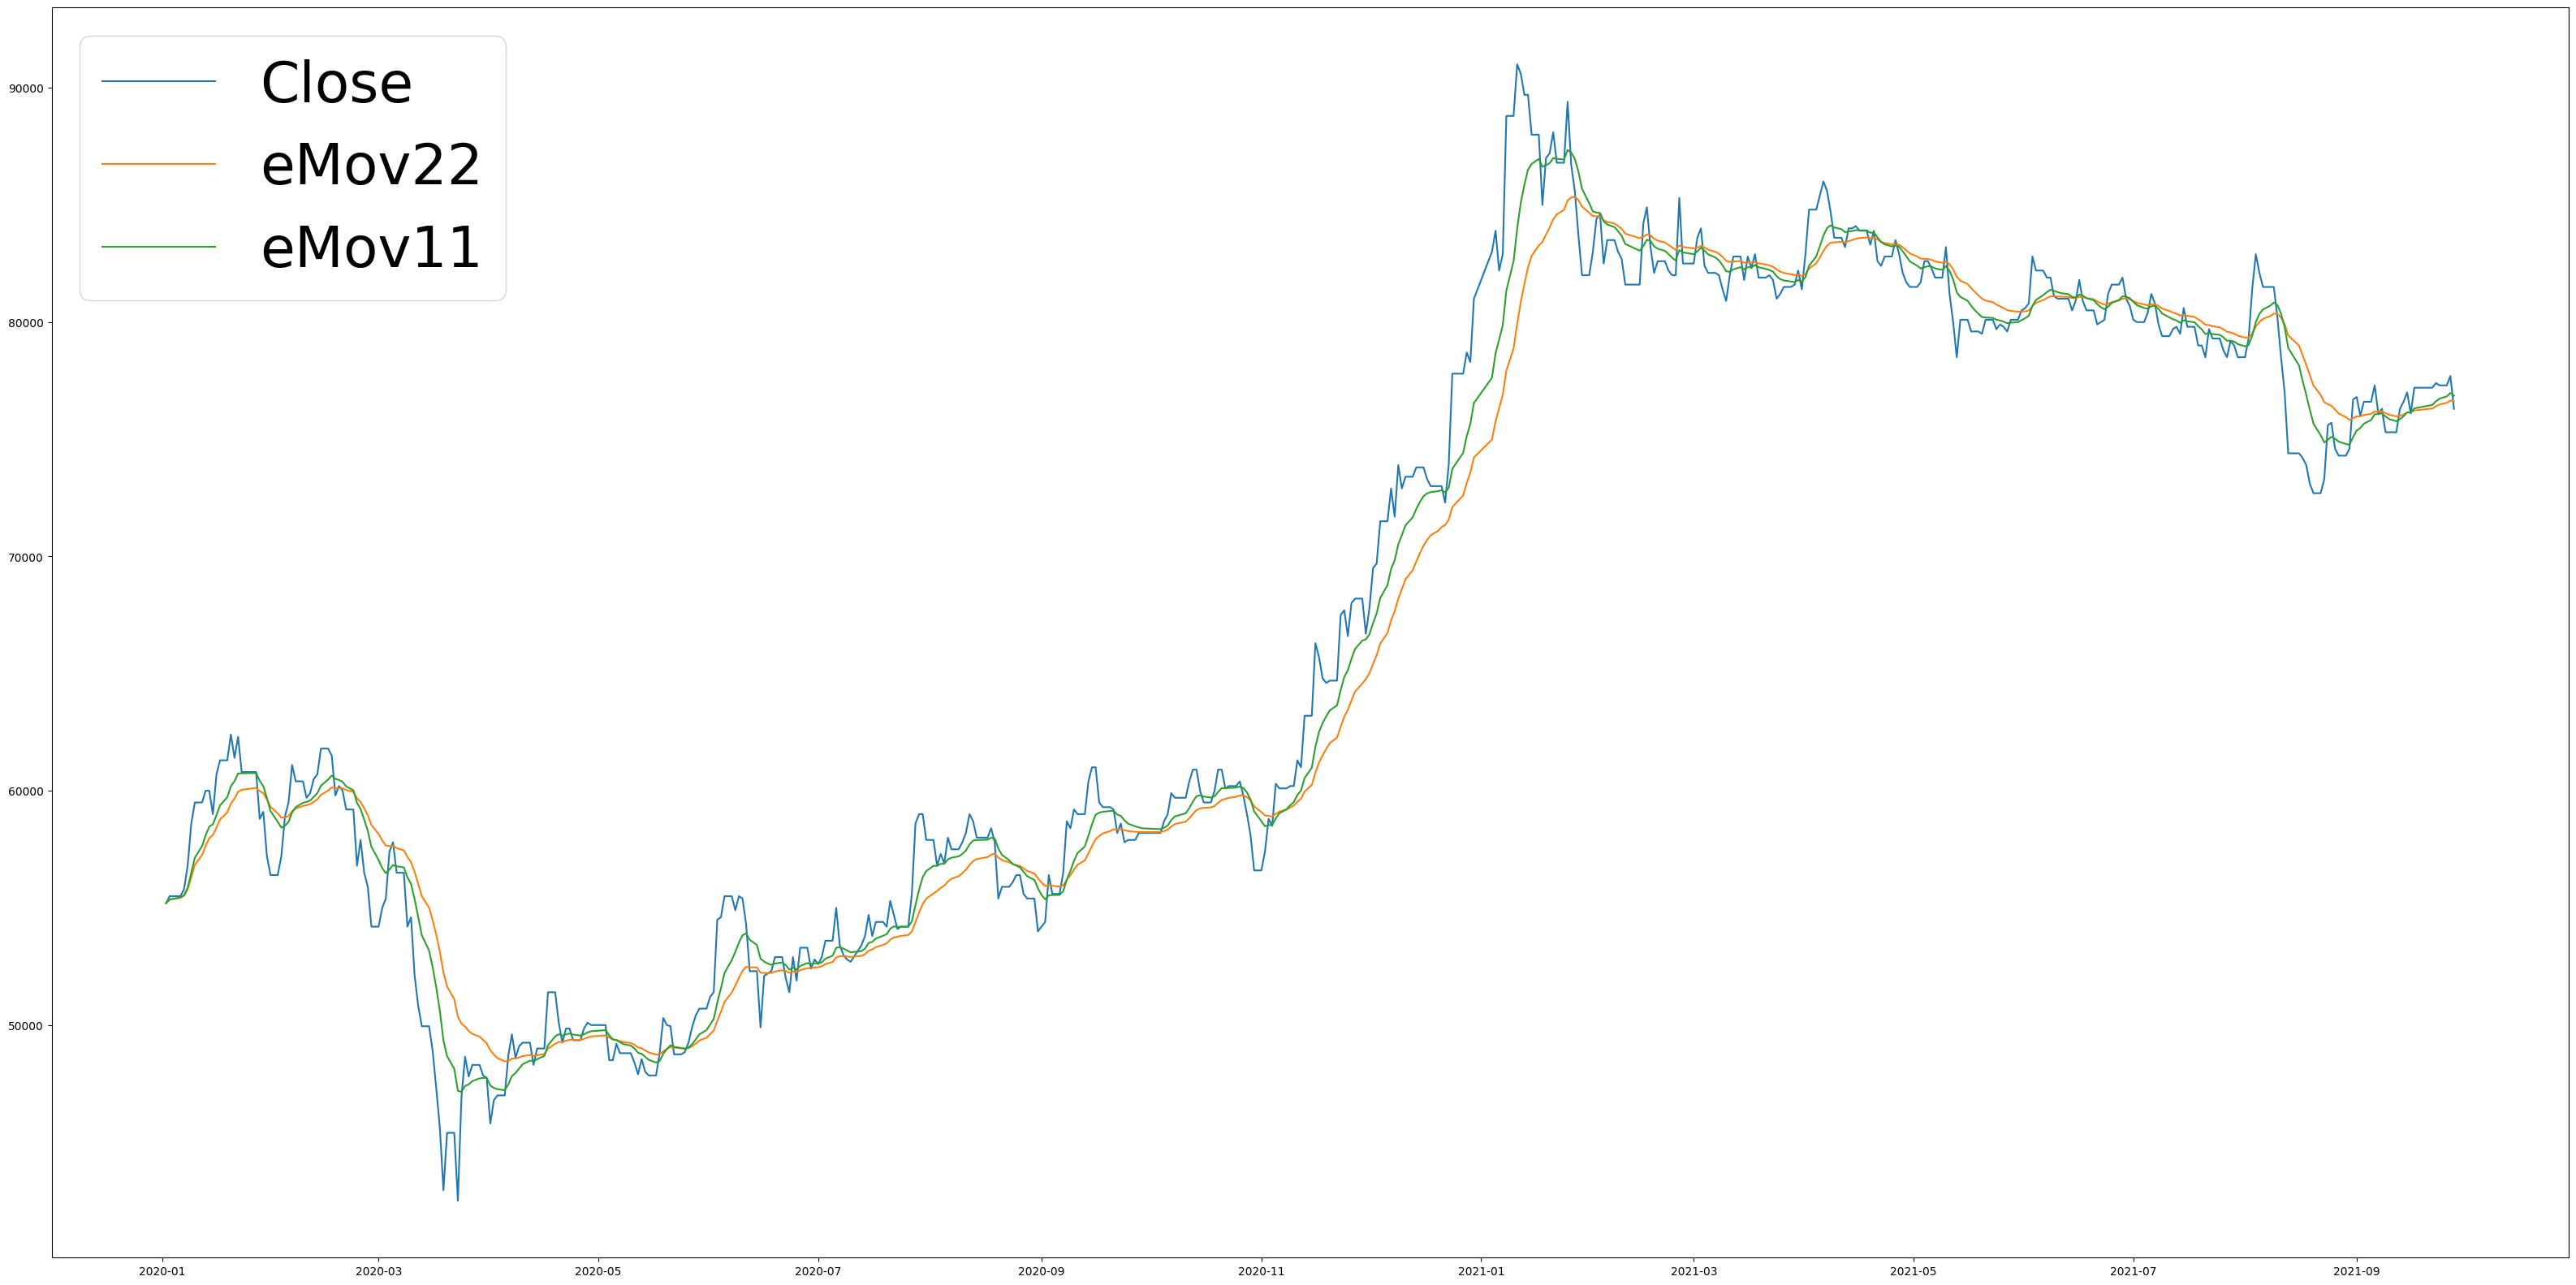

In [9]:
fig, ax1 = plt.subplots(figsize=[40, 20])
ax1.plot(samsung_df.Close, label="Close")
ax1.plot(samsung_eMov22.Close, label="eMov22")
ax1.plot(samsung_eMov11.Close, label="eMov11")
ax1.legend(prop={'size':50})
plt.show()

## MACD

In [10]:
samsung_eMov26 = samsung_df.Close.ewm(span=26).mean()
samsung_eMov12 = samsung_df.Close.ewm(span=12).mean()

In [11]:
macd_line = samsung_eMov26 - samsung_eMov12

In [12]:
signal_line = macd_line.ewm(span=9).mean()

In [33]:
def MACD(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    eMov26 = df.Close.ewm(span=26).mean()
    eMov12 = df.Close.ewm(span=12).mean()
    
    macd_line = eMov26 - eMov12
    signal_line = macd_line.ewm(span=9).mean()
    
    df["MACD_Line"] = macd_line
    df["Signal_Line"] = signal_line
    
    return df

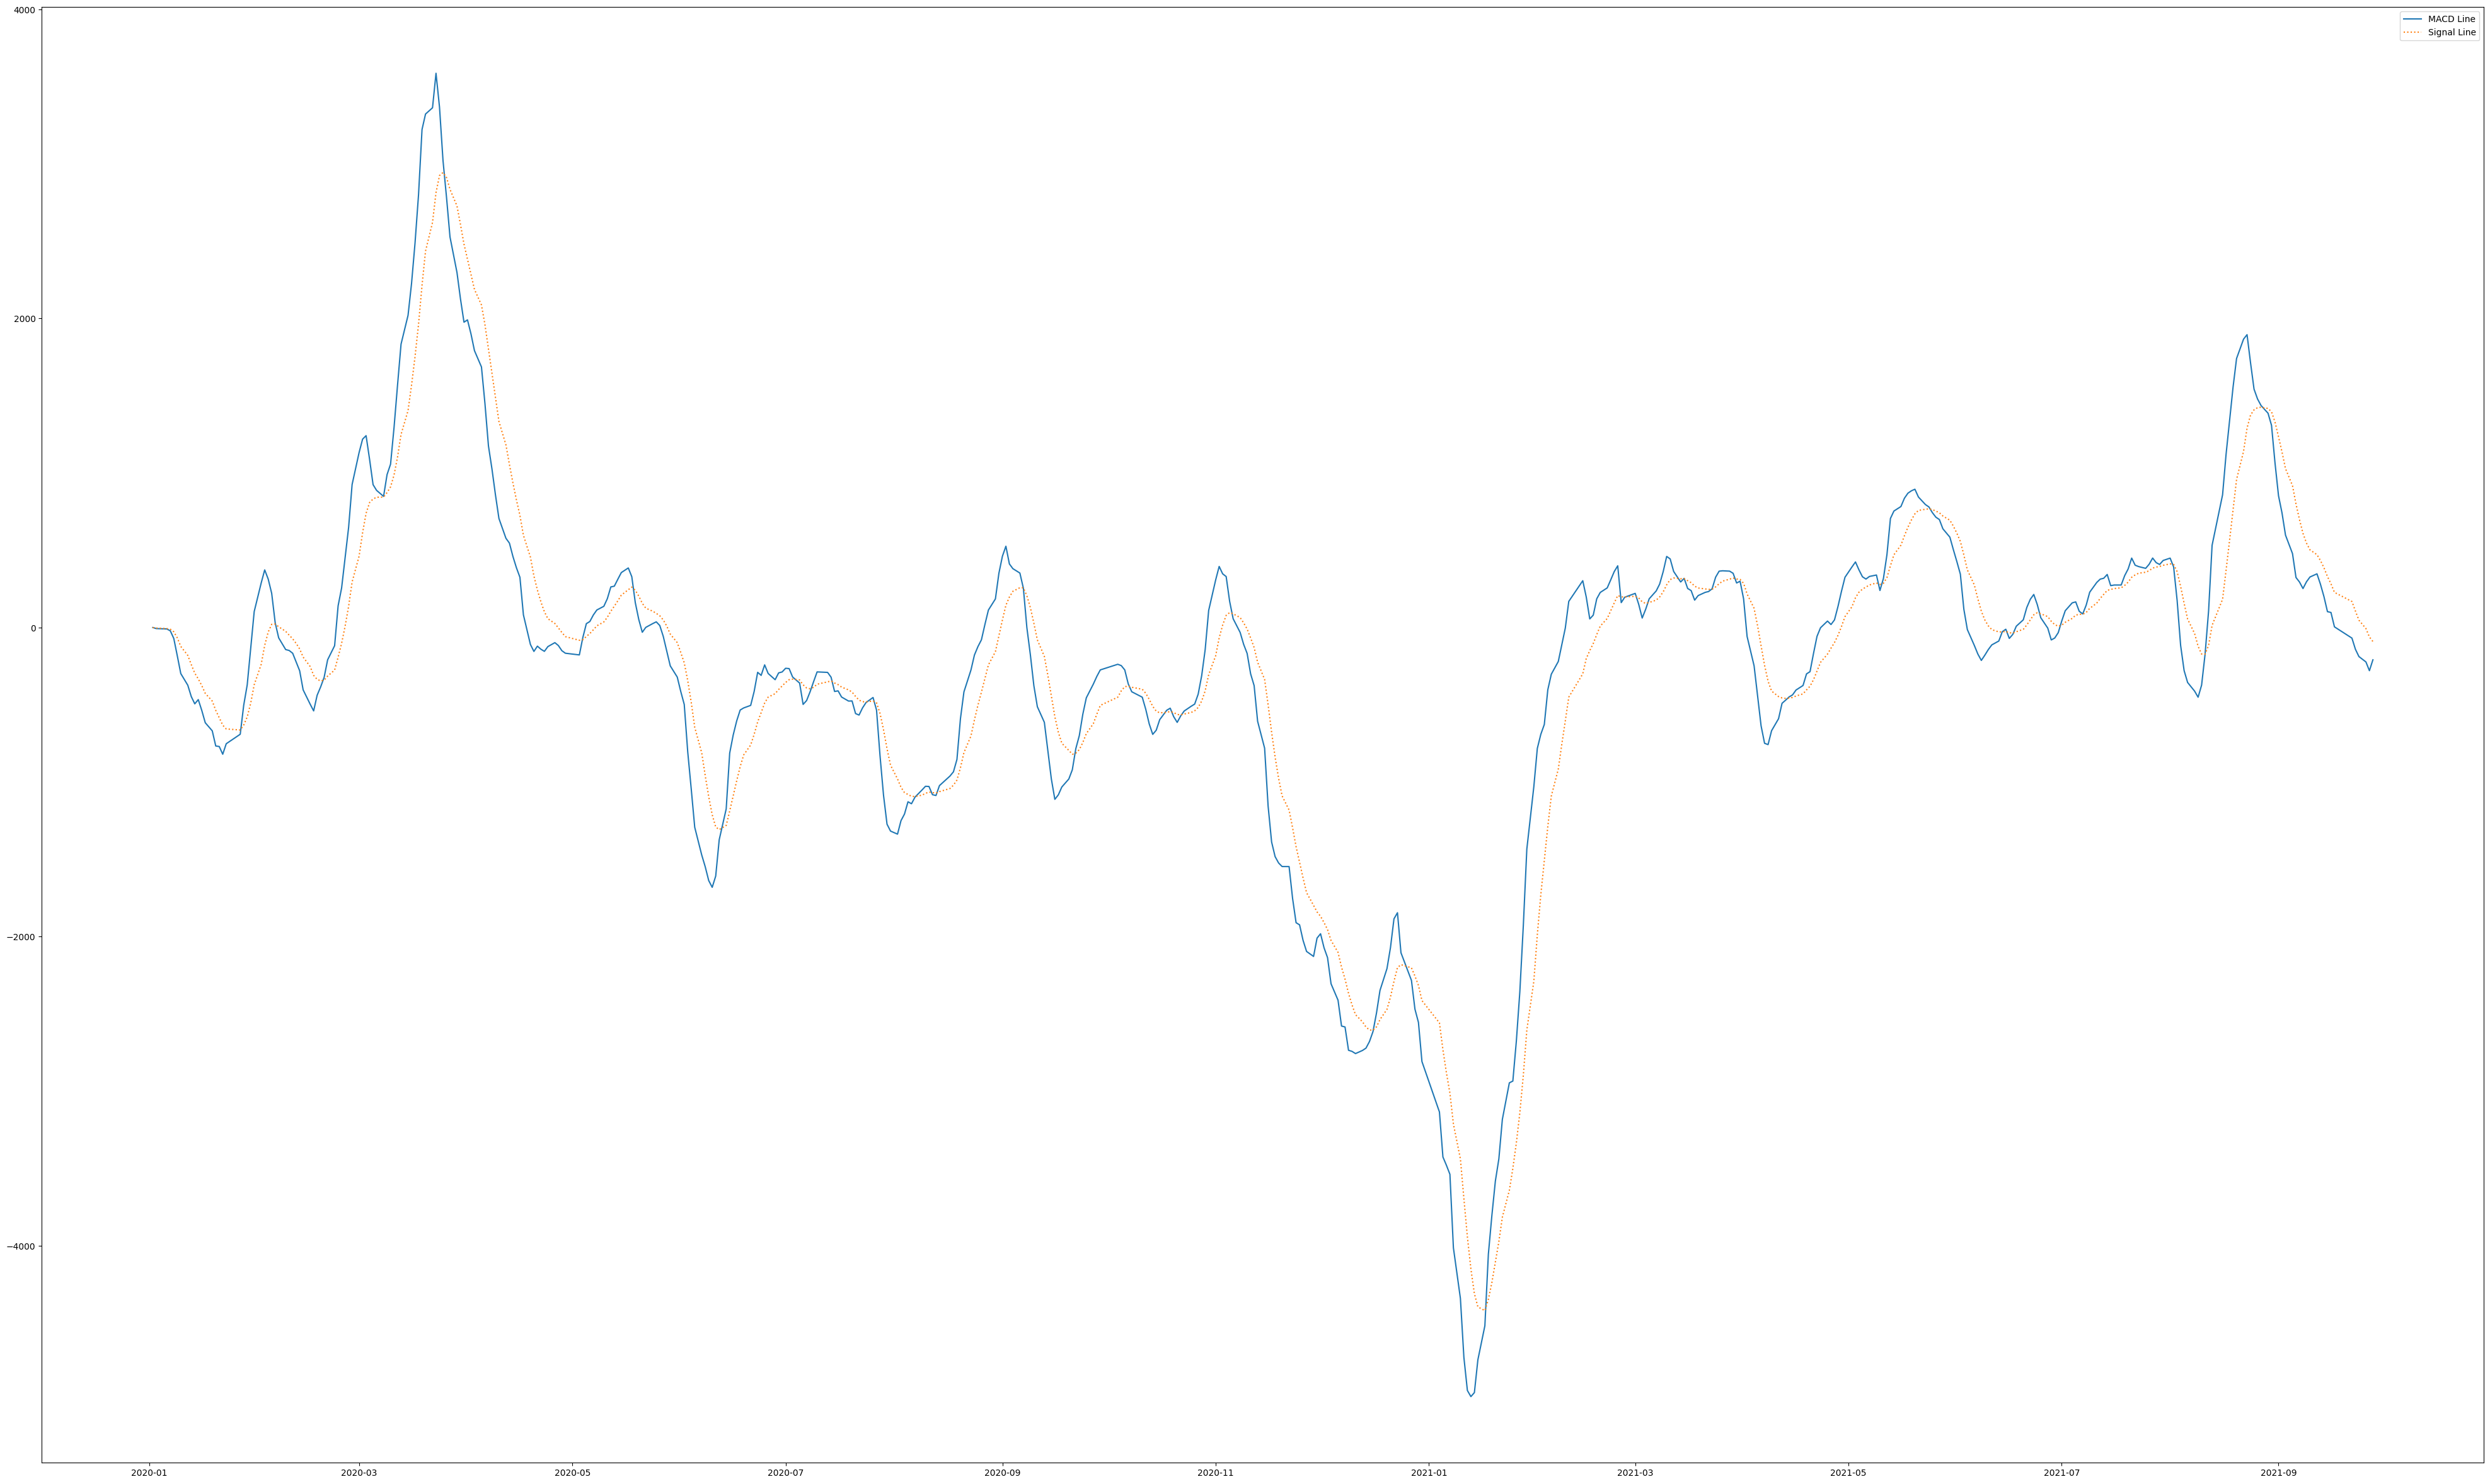

In [13]:
fig, ax2 = plt.subplots(figsize=[50, 30])
ax2.plot(macd_line, label="MACD Line")
ax2.plot(signal_line, label="Signal Line", linestyle='dotted')
ax2.legend()

## 방향성 시스템

In [14]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54


In [15]:
def get_DM(dataframe = pd.DataFrame):
    
    df = dataframe.copy()
    plus_dm = pd.Series(df.High.diff())
    minus_dm = pd.Series(df.Low.diff())
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    plus_dm.fillna(0, inplace=True)
    minus_dm.fillna(0, inplace=True)
    df["plus_dm"] = plus_dm.apply(abs)
    df["minus_dm"] = minus_dm.apply(abs)
    
    
    return df

In [16]:
samsung_df.Close[0]

55200.0

In [17]:
def get_TR(dataframe = pd.DataFrame):
    df = dataframe.copy()
    df["Close_yest"] = df.Close.shift(1)
    df["Close_yest"].fillna(df["Close"][0], inplace=True)
    
    a1 = abs(df.High - df.Low)
    a2 = abs(df.High - df["Close_yest"])
    a3 = abs(df.Low - df["Close_yest"])
    
    TR_candidates = pd.concat([a1, a2, a3], axis=1)
    df["TR"] = TR_candidates.apply(max, axis=1)
    
    df.drop(["Close_yest"], axis=1, inplace=True)
    
    return df

In [18]:
get_TR(samsung_df)

,Open,High,Low,Close,Volume,Change Pct,TR
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,1000.0
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,1700.0
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,1000.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,900.0
...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,700.0
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,600.0
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,0.0


In [19]:
get_DM(samsung_df)

,Open,High,Low,Close,Volume,Change Pct,plus_dm,minus_dm
Date,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,0.0,0.0
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,600.0,100.0
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.0,0.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,100.0,900.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,800.0,0.0
...,...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,400.0,300.0
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,100.0,0.0
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,0.0,0.0


In [20]:
def get_DI(dataframe = pd.DataFrame):
    
    df = dataframe.copy()
    df = get_TR(get_DM(df))
    
    plus_di = df["plus_dm"] / df["TR"]
    minus_di = df["minus_dm"] / df["TR"]
    
    df["plus_di"] = plus_di.fillna(0)
    df["minus_di"] = minus_di.fillna(0)
    
    df.drop(["plus_dm", "minus_dm"], axis=1, inplace=True)
    
    return df

In [21]:
samsung_df_di = get_DI(samsung_df)

In [22]:
samsung_df_di.head()

,Open,High,Low,Close,Volume,Change Pct,TR,plus_di,minus_di
Date,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,1000.0,0.000000,0.000000
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,1700.0,0.352941,0.058824
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.0,0.000000,0.000000
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,1000.0,0.100000,0.900000
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,900.0,0.888889,0.000000


In [23]:
plus_eDI_13 = samsung_df_di.plus_di.ewm(span=13).mean()
minus_eDI_13 = samsung_df_di.minus_di.ewm(span=13).mean()

In [24]:
plus_eDI_13

Date
2020-01-02    0.000000
2020-01-03    0.190045
2020-01-05    0.116721
2020-01-06    0.111530
2020-01-07    0.318201
                ...   
2021-09-23    0.258015
2021-09-24    0.244965
2021-09-26    0.209970
2021-09-27    0.261607
2021-09-28    0.224235
Name: plus_di, Length: 524, dtype: float64

In [25]:
minus_eDI_13

Date
2020-01-02    0.000000
2020-01-03    0.031674
2020-01-05    0.019453
2020-01-06    0.292781
2020-01-07    0.214942
                ...   
2021-09-23    0.188324
2021-09-24    0.161421
2021-09-26    0.138361
2021-09-27    0.179819
2021-09-28    0.230321
Name: minus_di, Length: 524, dtype: float64

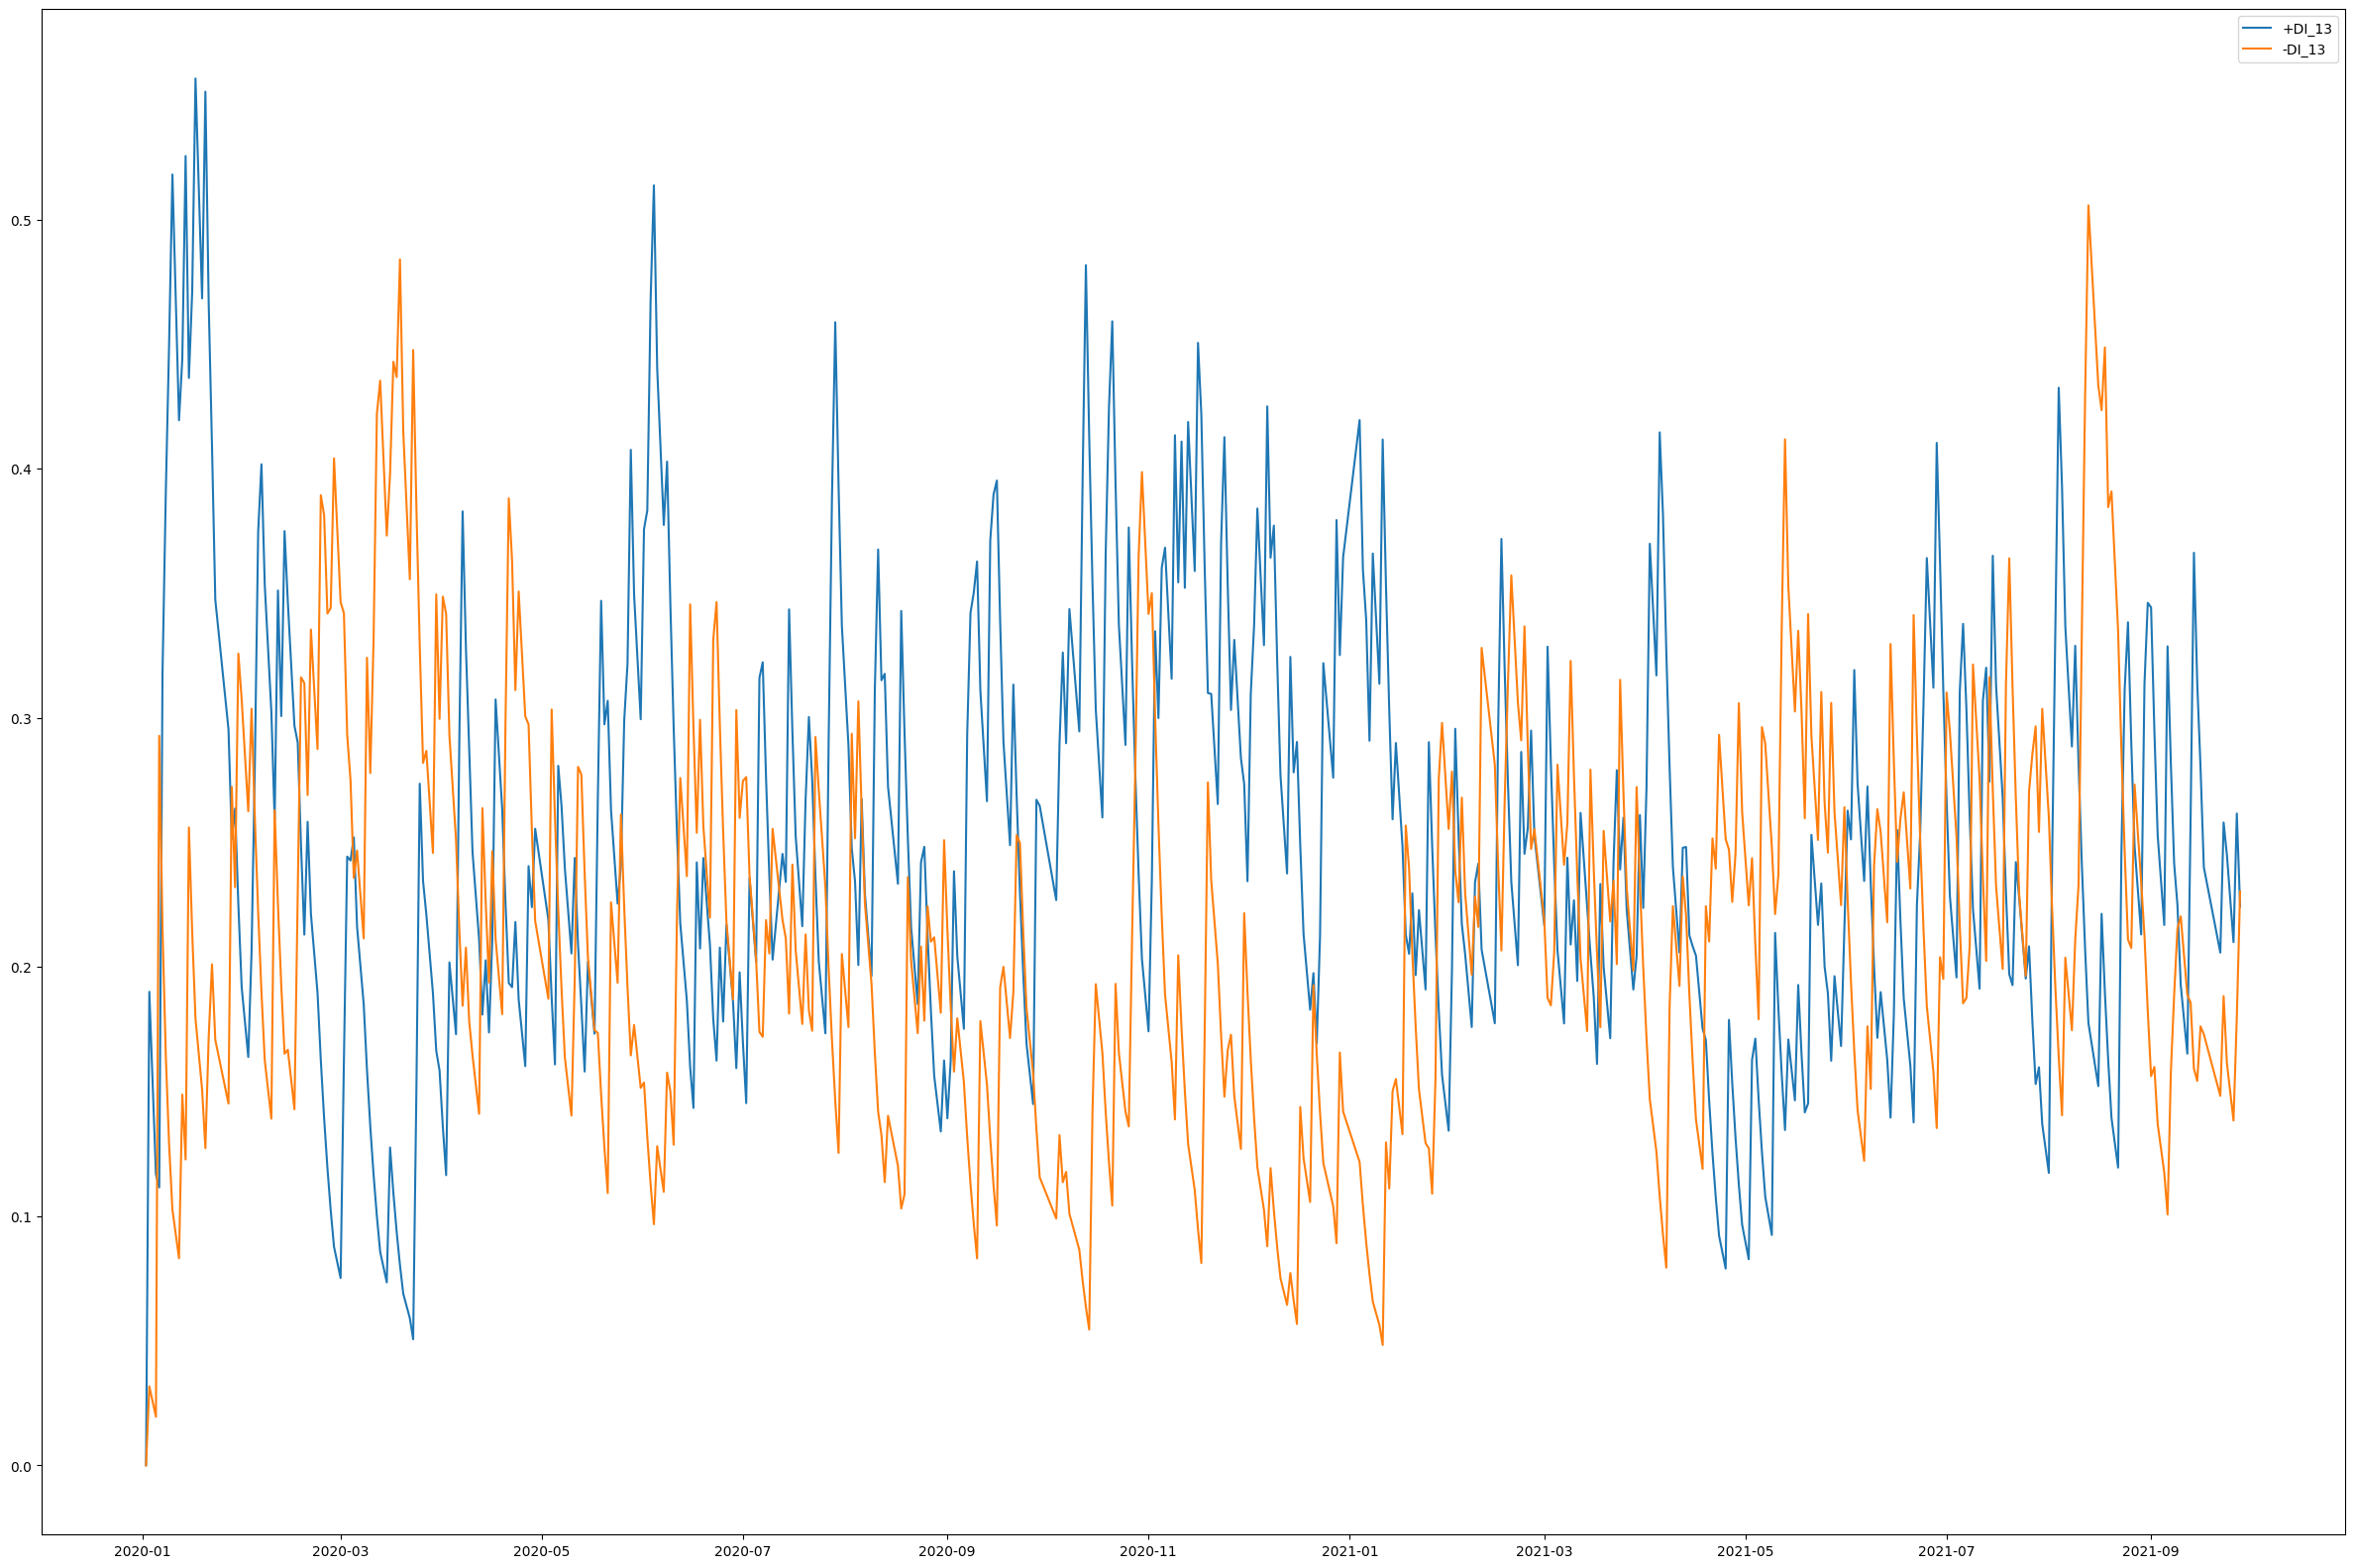

In [26]:
fig, ax3 = plt.subplots(figsize=[30, 20])
ax3.plot(plus_eDI_13, label="+DI_13")
ax3.plot(minus_eDI_13, label="-DI_13")
plt.legend()
plt.show()

In [27]:
def ADX(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    df = get_DI(df)
    plus_eDI_13 = df["plus_di"].ewm(span=13).mean()
    minus_eDI_13 = df["minus_di"].ewm(span=13).mean()
    
    DX = (plus_eDI_13 - minus_eDI_13) / (plus_eDI_13 + minus_eDI_13) * 100
    
    ADX = DX.ewm(span=13).mean()
    df["+DI_13"] = plus_eDI_13
    df["-DI_13"] = minus_eDI_13
    df["ADX"] = ADX.fillna(0)
    
    df.drop(["plus_di", "minus_di"], axis=1, inplace=True)
    
    
    return df

In [28]:
samsung_ADX = ADX(samsung_df)

In [29]:
def ATR(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    ATR = df["TR"].ewm(span=13).mean()
    df["ATR"] = ATR
    
    df.drop(["TR"], axis=1, inplace=True)
    
    return df

In [30]:
ATR(samsung_ADX)

,Open,High,Low,Close,Volume,Change Pct,+DI_13,-DI_13,ADX,ATR
Date,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,0.000000,0.000000,0.000000,1000.000000
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,0.190045,0.031674,71.428571,1376.923077
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.116721,0.019453,71.428571,845.669291
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,0.111530,0.292781,26.573098,893.574661
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,0.318201,0.214942,24.336555,895.282914
...,...,...,...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,0.258015,0.188324,17.933812,889.790448
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,0.244965,0.161421,18.308686,848.391813
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,0.209970,0.138361,18.630007,727.192982


In [31]:
def ADX_ATR(dataframe = pd.DataFrame, preiod = 13):
    
    def get_DM(dataframe = pd.DataFrame):
    
        df = dataframe.copy()
        plus_dm = pd.Series(df.High.diff())
        minus_dm = pd.Series(df.Low.diff())
        plus_dm[plus_dm < 0] = 0
        minus_dm[minus_dm > 0] = 0
        plus_dm.fillna(0, inplace=True)
        minus_dm.fillna(0, inplace=True)
        df["plus_dm"] = plus_dm.apply(abs)
        df["minus_dm"] = minus_dm.apply(abs)
    
    
        return df

    def get_TR(dataframe = pd.DataFrame):
        df = dataframe.copy()
        df["Close_yest"] = df.Close.shift(1)
        df["Close_yest"].fillna(df["Close"][0], inplace=True)
    
        a1 = abs(df.High - df.Low)
        a2 = abs(df.High - df["Close_yest"])
        a3 = abs(df.Low - df["Close_yest"])
    
        TR_candidates = pd.concat([a1, a2, a3], axis=1)
        df["TR"] = TR_candidates.apply(max, axis=1)
    
        df.drop(["Close_yest"], axis=1, inplace=True)
    
        return df

    def get_DI(dataframe = pd.DataFrame):
    
        df = dataframe.copy()
        df = get_TR(get_DM(df))
    
        plus_di = df["plus_dm"] / df["TR"]
        minus_di = df["minus_dm"] / df["TR"]
    
        df["plus_di"] = plus_di.fillna(0)
        df["minus_di"] = minus_di.fillna(0)
    
        df.drop(["plus_dm", "minus_dm"], axis=1, inplace=True)
    
        return df

    
    def ADX(dataframe = pd.DataFrame):
        df = dataframe.copy()
    
        df = get_DI(df)
        plus_eDI_13 = df["plus_di"].ewm(span=13).mean()
        minus_eDI_13 = df["minus_di"].ewm(span=13).mean()
    
        DX = (plus_eDI_13 - minus_eDI_13) / (plus_eDI_13 + minus_eDI_13) * 100
    
        ADX = DX.ewm(span=13).mean()
        df["+DI_13"] = plus_eDI_13
        df["-DI_13"] = minus_eDI_13
        df["ADX"] = ADX.fillna(0)
    
        df.drop(["plus_di", "minus_di"], axis=1, inplace=True)
    
        return df

    def ATR(dataframe = pd.DataFrame):
        df = dataframe.copy()
    
        ATR = df["TR"].ewm(span=13).mean()
        df["ATR"] = ATR
    
        df.drop(["TR"], axis=1, inplace=True)
    
        return df
    
    return ATR(ADX(dataframe))

In [32]:
ADX_ATR(samsung)

,Open,High,Low,Close,Volume,Change Pct,+DI_13,-DI_13,ADX,ATR
Date,,,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,0.000000,0.000000,0.000000,1000.000000
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,0.190045,0.031674,71.428571,1376.923077
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.116721,0.019453,71.428571,845.669291
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,0.111530,0.292781,26.573098,893.574661
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,0.318201,0.214942,24.336555,895.282914
...,...,...,...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,0.258015,0.188324,17.933812,889.790448
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,0.244965,0.161421,18.308686,848.391813
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,0.209970,0.138361,18.630007,727.192982


## 스토캐스틱

In [35]:
def slow_stochastic(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    Hn = df.High.rolling(window=5).max()
    Ln = df.Low.rolling(window=5).min()    
    raw_stochastic = (df.Close - Ln) / (Hn - Ln) * 100
    
    averaged_raw_stochastic = raw_stochastic.ewm(span=3).mean()
    
    averaged_once_more = averaged_raw_stochastic.ewm(span=3).mean()
    
    df["%K"] = averaged_raw_stochastic
    df["%D"] = averaged_once_more
    
    return df

In [36]:
slow_stochastic(samsung)

,Open,High,Low,Close,Volume,Change Pct,%K,%D
Date,,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,NaN,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,NaN,NaN
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,NaN,NaN
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,NaN,NaN
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,60.000000,60.000000
...,...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,78.838016,71.997936
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,78.307897,75.152917
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,78.042837,76.597877


## 상대강도지수 RSI

In [63]:
def RSI(dataframe = pd.DataFrame, period=7):
    df = dataframe.copy()
    
    up = np.where(df.Close.diff() > 0, df.Close.diff(), 0)
    down = np.where(df.Close.diff() < 0, df.Close.diff() * (-1), 0)
    
    average_up = pd.Series(up).rolling(window=period, min_periods=period).mean()
    average_down = pd.Series(down).rolling(window=period, min_periods=period).mean()
    
    RSI = 100 - (100) / (1 + (average_up / average_down))
    RSI.index = df.index
    
    df["RSI"] = RSI
    
    return df

# 거래량 지표

## OBV

In [71]:
def OBV(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    obv = pd.Series(index=df.index, dtype="float")
    obv.iloc[0] = df.Volume.iloc[0]
    
    for i in range(1, df.shape[0]):
        if df.Close.iloc[i] > df.Close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + df.Volume.iloc[i]
            
        elif df.Close.iloc[i] < df.Close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] - df.Volume.iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i-1]
            
    df["OBV"] = obv
    
    return df

In [72]:
OBV(samsung)

,Open,High,Low,Close,Volume,Change Pct,OBV
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,12756901.0
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,28064211.0
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,28064211.0
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,28064211.0
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,37958057.0
...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,-251448440.0
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,-263295381.0
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,-263295381.0


## 매집/분산지표 A/D

In [75]:
def A_D(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    A_D = (df.Close - df.Open) / (df.High - df.Low) * df.Volume
    
    df["A/D"] = A_D.fillna(0)
    
    return df

In [76]:
A_D(samsung)

,Open,High,Low,Close,Volume,Change Pct,A/D
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,-3.827070e+06
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,-4.502150e+06
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.000000e+00
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,6.141844e+06
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,1.236731e+06
...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,-6.928571e+01
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,-5.923470e+06
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,0.000000e+00


## 강도지수

In [80]:
def SI(dataframe = pd.DataFrame):
    df = dataframe.copy()
    
    SI = df.Close.diff() * df.Volume
    
    df["SI"] = SI.fillna(0)
    
    return df

In [79]:
SI(samsung)

,Open,High,Low,Close,Volume,Change Pct,SI
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,NaN
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,4.592193e+09
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,0.000000e+00
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,0.000000e+00
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,2.968154e+09
...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,9.700000e+04
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,-1.184694e+09
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,0.000000e+00


In [85]:
def eSI(dataframe = pd.DataFrame, period = 2):
    df = dataframe.copy()
    
    SI = df.Close.diff() * df.Volume
    
    SI.fillna(0, inplace=True)
    
    eSI = SI.ewm(span=period).mean()
    
    df["eSI_{}".format(period)] = eSI
    
    return df

In [86]:
eSI(samsung)

,Open,High,Low,Close,Volume,Change Pct,eSI_2
Date,,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,12756901,-1.08,0.000000e+00
2020-01-03,56000.0,56600.0,54900.0,55500.0,15307310,0.54,3.444145e+09
2020-01-05,55500.0,55500.0,55500.0,55500.0,0,0.00,1.059737e+09
2020-01-06,54900.0,55600.0,54600.0,55500.0,10236406,0.00,3.444145e+08
2020-01-07,55700.0,56400.0,55600.0,55800.0,9893846,0.54,2.100802e+09
...,...,...,...,...,...,...,...
2021-09-23,77500.0,77600.0,76900.0,77400.0,485,0.26,9.896290e+08
2021-09-24,77600.0,77700.0,77100.0,77300.0,11846941,-0.13,-4.599197e+08
2021-09-26,77300.0,77300.0,77300.0,77300.0,0,0.00,-1.533066e+08
